# Project 1

The purpose of this notebook to document preliminary analyses of DiscGolf to average income.

DiscGolf.csv was sourced from https://www.kaggle.com/datasets/lanekatris/pdga-united-states-disc-golf-courses

postcode_level_averages was sourced from https://www.kaggle.com/datasets/hamishgunasekara/average-income-per-zip-code-usa-2018

Data joined and saved to the Resources folder as "draft_dgolf_avincome.csv"


In [11]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import requests
import json
from scipy.stats import linregress
import datetime

In [12]:
#read CSV and create Pandas DataFrames
draftdf = pd.DataFrame(pd.read_csv('Resources/draft_dgolf_avincome.csv'))

In [13]:
#check df
draftdf.head(2)

,Unnamed: 0,id,name,city,state_x,zip,holeCount,rating,latitude,longitude,Modified,Comments,state_y,zipcode,total_pop,total_income,country,avg_income
0,0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Alabama,36804,3,NaN,32.645412,-85.378280,no,none,AL,36804,8240,417346,USA,50648.786408
1,1,agape-disc-golf-course,Agape Disc Golf Course,Scottsboro,Alabama,35769,9,NaN,34.622819,-86.080692,no,none,AL,35769,4170,316625,USA,75929.256595


In [ ]:
mergeall.plot.(x = '',y = 'total_pop',s = 50)

In [14]:
#create summary by state:  of number of courses, total population, average income, course rating

subdraftdf = draftdf[['state_x','total_pop','avg_income','holeCount','rating']]
subdraftdf.head()
groupdf= subdraftdf.groupby(['state_x'])

ltotpop = [groupdf['total_pop'].sum()]
lavinc = [groupdf['avg_income'].mean()]
lavholes = [groupdf['holeCount'].mean()]
lavrating = [groupdf['rating'].mean()]
ltotcourses = [groupdf['holeCount'].count()]

totpop = pd.DataFrame(ltotpop).transpose()
avinc = pd.DataFrame(lavinc).transpose()
avholes = pd.DataFrame(lavholes).transpose()
avrating = pd.DataFrame(lavrating).transpose()
totcourses = pd.DataFrame(ltotcourses).transpose()


merge12 = pd.merge(totpop,avinc,on='state_x')
merge34 = pd.merge(avholes,avrating,on='state_x')
merge12nmore = pd.merge(merge12,totcourses,on='state_x').rename(columns = {"holeCount":"n_courses"})
merge12nmore
mergeall = pd.merge(merge12nmore,merge34,on='state_x')
mergeall


,total_pop,avg_income,n_courses,holeCount,rating
state_x,,,,,
Alabama,970510,60129.955845,121,15.438017,3.673913
Alaska,288780,74791.929935,31,13.451613,3.692308
Arizona,994820,63961.727080,71,13.887324,3.410256
Arkansas,886250,55399.123422,109,13.981651,3.789474
California,4093380,75793.617001,309,14.239482,3.280000
Colorado,1879100,80219.338127,176,13.886364,3.277778
Connecticut,330080,109678.582339,30,14.933333,3.611111
Delaware,178660,71301.197832,13,16.769231,3.000000
Florida,2229570,71147.145914,178,14.471910,3.603774


In [20]:
mergeallsort = mergeall.sort_values('n_courses',ascending= False)
mergeallsort

,total_pop,avg_income,n_courses,holeCount,rating
state_x,,,,,
Texas,6156110,73725.588366,464,13.896552,3.398936
Wisconsin,2489580,66144.270928,344,12.281977,3.550388
Minnesota,2365280,69054.948215,339,11.265487,3.093750
California,4093380,75793.617001,309,14.239482,3.280000
Michigan,2712540,65157.653139,300,15.246667,3.713043
Iowa,1346220,66076.191609,287,11.668990,3.221053
Illinois,2729860,76785.410580,285,12.610526,3.084746
North Carolina,3199590,64588.386519,273,14.739927,3.364341
Ohio,2999610,62402.605148,261,13.762452,3.062937


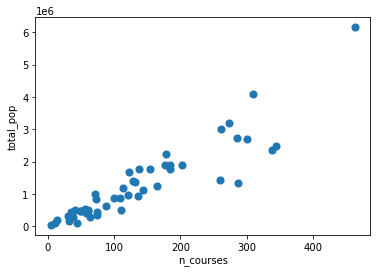

In [17]:
mergeall.plot.scatter(x = 'n_courses',y = 'total_pop',s = 50)

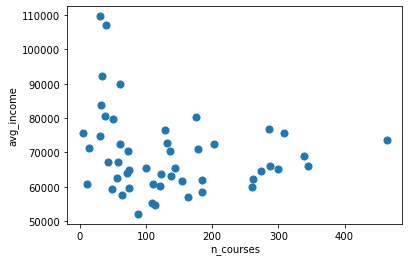

In [18]:
mergeall.plot.scatter(x = 'n_courses',y = 'avg_income',s = 50)

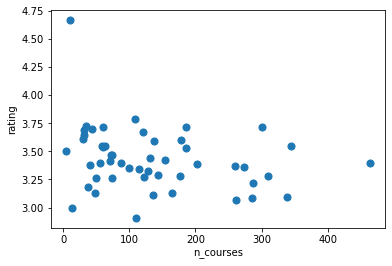

In [19]:
mergeall.plot.scatter(x = 'n_courses',y = 'rating',s = 50)

In [15]:
#create a scatterplot function


df = 'mergeall'
datasetID = 'DiscGolf'
xparam = 'ltotcourses'
yparam = 'ltotpop'
yunits = 'state_pop'
fcolor = 'lightblue'
ecolor = 'mediumblue'

#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html


def LRPlots():
    xdata = df[xparam]
    ydata = df[yparam]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize = (9,7))
    plt.scatter(xdata, ydata, marker="o", facecolors=fcolor, edgecolors=ecolor,s =75)

    # plt.xlim(-55,85)
    # plt.ylim(0,105)
    annotatex = min(xdata)+0.1*max(xdata)
    annotatey = max(ydata)-0.1*max(ydata)

    plt.plot(xdata,regress_values,"darkslategray")
    plt.annotate(f'{line_eq} r={round(rvalue,2)}',(annotatex,annotatey),fontsize=15,color="black")
    

    plt.title(f"{xparam} vs. {yparam}")
    plt.xlabel(f"{xparam}")
    plt.ylabel(f"[{yparam} {yunits}]")
    plt.grid()


    
    print(f'The r-value is {round(rvalue,2)}')

   

    # Save the figure
    figname = f'{datasetID}_{xparam}_vs_{yparam}'
    
    plt.savefig(f"output_data/{figname}.png")

    # Show plot
    plt.show()

LRPlots()

TypeError: string indices must be integers

In [ ]:
# scatter plot of state population vs number of disc golf courses

In [ ]:
# scatter plot of state average income vs number of disc golf courses

In [ ]:
#My  Define a function to create Linear Regression plots
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s)

datasetID = 'DiscGolf'
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'
fcolor = 'lightblue'
ecolor = 'mediumblue'

#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html


def LRPlots():
    xdata = df[xparam]
    ydata = df[yparam]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize = (9,7))
    plt.scatter(xdata, ydata, marker="o", facecolors=fcolor, edgecolors=ecolor,s =75)

    # plt.xlim(-55,85)
    # plt.ylim(0,105)
    annotatex = min(xdata)+0.1*max(xdata)
    annotatey = max(ydata)-0.1*max(ydata)

    plt.plot(xdata,regress_values,"darkslategray")
    plt.annotate(f'{line_eq} r={round(rvalue,2)}',(annotatex,annotatey),fontsize=15,color="black")
    

    plt.title(f"City Latitude vs. {yparam} ({datedatapull})")
    plt.xlabel("Latitude")
    plt.ylabel(f"[{yparam} {yunits}]")
    plt.grid()


    
    print(f'The r-value is {round(rvalue,2)}')

   

    # Save the figure
    figname = f'{datasetID}_{xparam}_vs_{yparam}'
    
    plt.savefig(f"output_data/{figname}.png")

    # Show plot
    plt.show()

LRPlots()

In [ ]:
# Disc Golf update zip so dtype is int64 instead of object so we can merge the two dfs

discgolfdf2 = discgolfdf.dropna(subset = ['zip'])
discgolfdf2sort = discgolfdf2.sort_values('zip')
discgolfdf2sort

discgolf drop zip NaN  DROP NA DOESN'T WORK BECAUSE IT'S NOT NA, sort doesn't work because it doesn't sort them at the beginning or end.  
DiscGolfClean = manually edited disc golf csv to fix zips, added Modified column (no,yes) and Comment column (none, or modification info)

In [ ]:
discgolfcleandf.head()

In [ ]:
discgolfcleandf.dtypes

In [ ]:
#check zipcodecsv 
zipcodedf.head(2)

In [ ]:
zipcodedf.dtypes

In [ ]:
# Create DraftMerge - inner join DiscGolfcleandf and zipcodedf
#nice reference https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/
draft_dgolf_avincome = pd.merge(discgolfcleandf,zipcodedf,how = 'inner',left_on='zip',right_on='zipcode')
draft_dgolf_avincome.head()


In [ ]:
#export draft_dgolf_avincome to csv
draft_dgolf_avincome.to_csv('Resources/draft_dgolf_avincome.csv')